# Credit Card

## Q1. Import csv file and perform exploratory data analysis by identifying size of the datasets, column information and null values.

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### A. Import csv file

In [2]:
df = pd.read_csv("cc_india.csv")
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


### B. Size of the datasets

In [3]:
df.size

182364

### C. Column information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


### D. Check for missing values

In [5]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

## Q2. Identify patterns such as gender wise spend anaysis, credit card category wise spend and month wise spends of the cutomers.

### A. Gender-wise Spend Analysis:

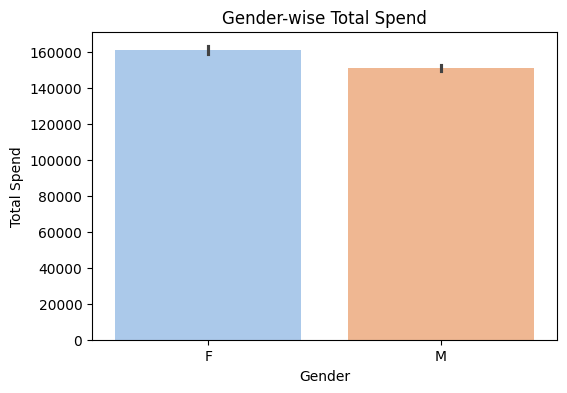

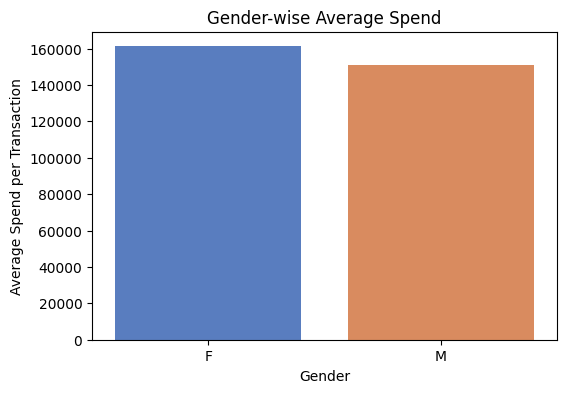

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Amount", hue="Gender", data=df, palette="pastel", legend=False)
plt.title("Gender-wise Total Spend")
plt.ylabel("Total Spend")
plt.show()

# Average spend by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Amount", hue="Gender", data=gender_avg_spend, palette="muted", legend=False)
plt.title("Gender-wise Average Spend")
plt.ylabel("Average Spend per Transaction")
plt.show()

### B. Credit Card Category-wise Spend:

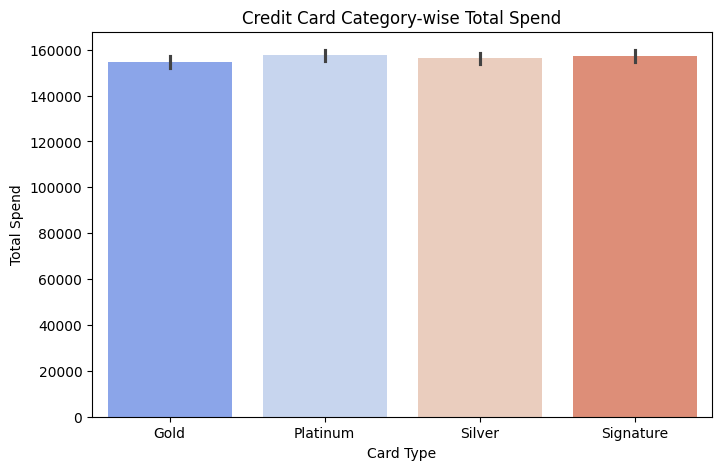

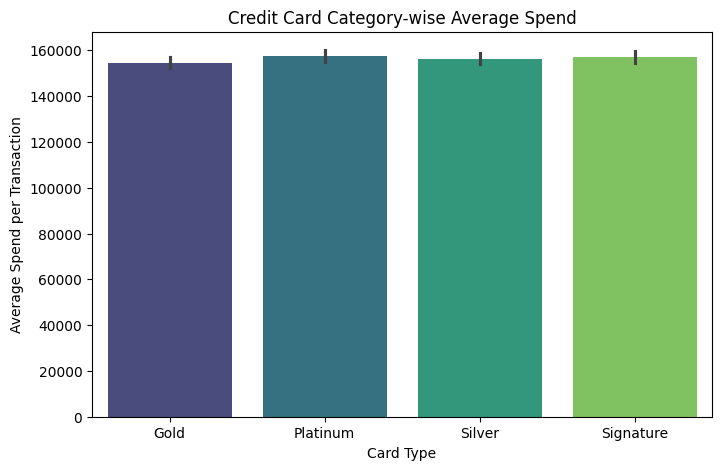

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x="Card Type", y="Amount", hue="Card Type", data=df, palette="coolwarm", legend=False)
plt.title("Credit Card Category-wise Total Spend")
plt.ylabel("Total Spend")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Card Type", y="Amount", hue="Card Type", data=df, palette="viridis", legend=False)
plt.title("Credit Card Category-wise Average Spend")
plt.ylabel("Average Spend per Transaction")
plt.show()

### C. Month-wise Spend Analysis

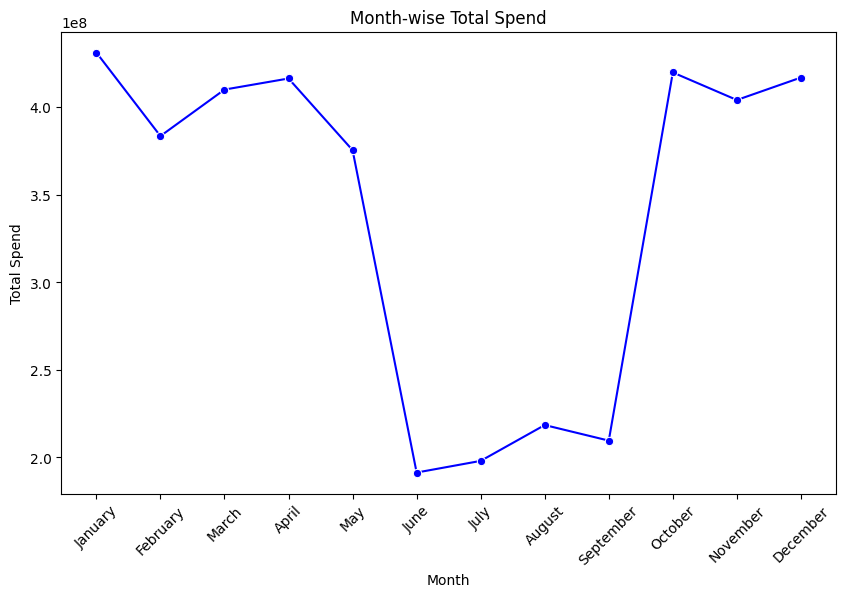

In [15]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors="coerce")

df["Month"] = df["Date"].dt.month_name()

month_spend = df.groupby("Month", as_index=False)["Amount"].sum()

months_order = ["January","February","March","April","May","June",
                "July","August","September","October","November","December"]

month_spend["Month"] = pd.Categorical(month_spend["Month"], categories=months_order, ordered=True)
month_spend = month_spend.sort_values("Month")

plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Amount", data=month_spend, marker="o", color="blue")
plt.title("Month-wise Total Spend")
plt.xticks(rotation=45)
plt.ylabel("Total Spend")
plt.show()


## Q3. Perform co-relation analysis for the given columns and generate co-relation matrix for the same. Identify co-relation patterns of credit card spends.

Correlation Matrix:
                City  Card Type  Exp Type    Gender    Amount     Month  \
City       1.000000  -0.007327  0.013091  0.031417 -0.036757  0.001485   
Card Type -0.007327   1.000000 -0.001390 -0.027465  0.005139  0.007833   
Exp Type   0.013091  -0.001390  1.000000  0.030258 -0.078778 -0.002816   
Gender     0.031417  -0.027465  0.030258  1.000000 -0.048928 -0.002055   
Amount    -0.036757   0.005139 -0.078778 -0.048928  1.000000 -0.010555   
Month      0.001485   0.007833 -0.002816 -0.002055 -0.010555  1.000000   
Year      -0.003409  -0.000072  0.006065 -0.000009  0.009809 -0.662265   

               Year  
City      -0.003409  
Card Type -0.000072  
Exp Type   0.006065  
Gender    -0.000009  
Amount     0.009809  
Month     -0.662265  
Year       1.000000  


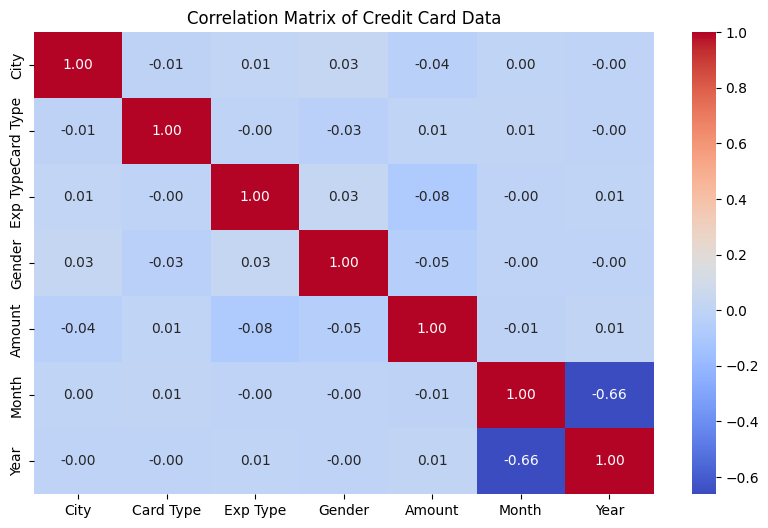

In [17]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

label_enc = LabelEncoder()
for col in ["City", "Card Type", "Exp Type", "Gender"]:
    df[col] = label_enc.fit_transform(df[col].astype(str))

if "index" in df.columns:
    df = df.drop(columns=["index"])

corr_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Credit Card Data")
plt.show()


## Q4. Identify city wise analysis and percentage of customers having spend grater than 5 lacs. Identify type of expenses according to gender of customer.

### A. City-wise Customers Spending more than 5 lacs.

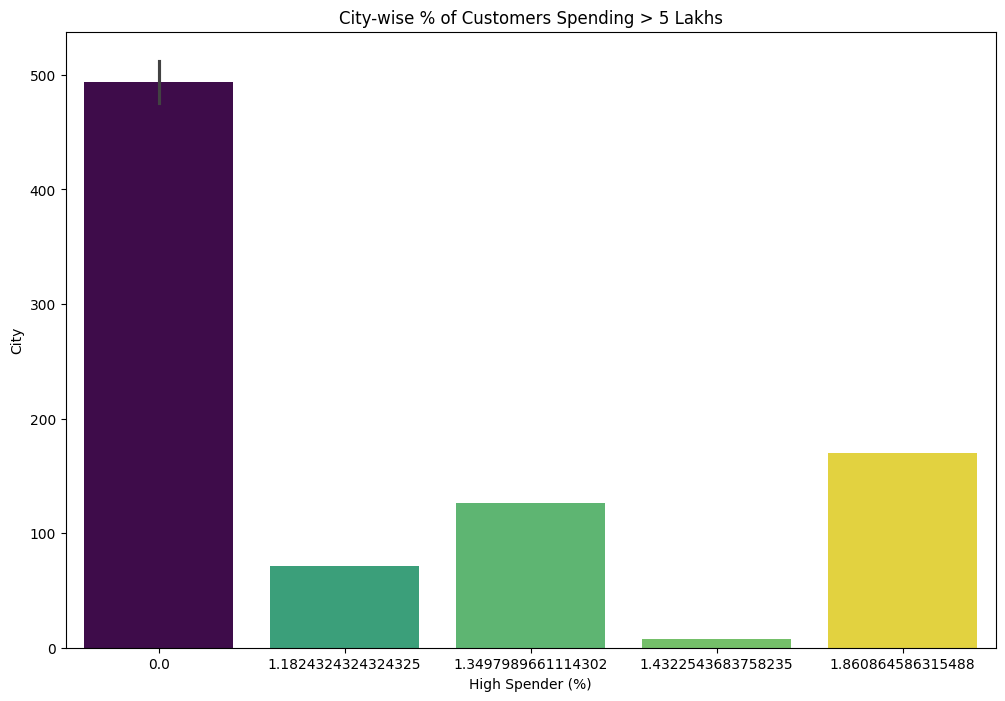

In [30]:
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df = df.reset_index(drop=True)
df["CustomerID"] = df.index

customer_spend = df.groupby(["City", "CustomerID"])["Amount"].sum().reset_index()
customer_spend["High_Spender"] = customer_spend["Amount"] > 500000

city_high_spend = customer_spend.groupby("City")["High_Spender"].mean().reset_index()
city_high_spend["High_Spender(%)"] = city_high_spend["High_Spender"] * 100
city_high_spend = city_high_spend.sort_values("High_Spender(%)", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(
    y="City",
    x="High_Spender(%)",
    data=city_high_spend,
    hue="High_Spender(%)",
    palette="viridis",
    legend=False
)
plt.title("City-wise % of Customers Spending > 5 Lakhs")
plt.xlabel("High Spender (%)")
plt.ylabel("City")
plt.show()

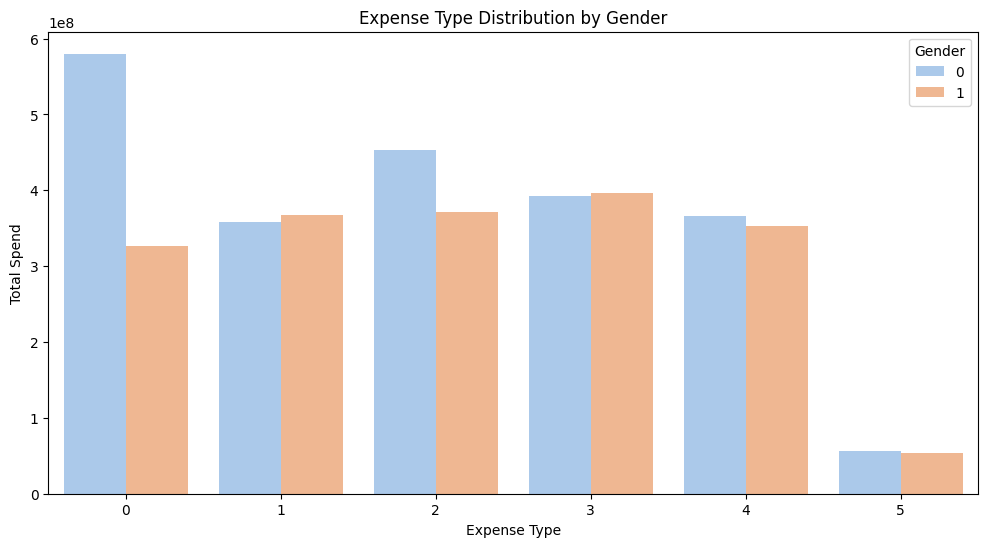

In [32]:
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

gender_expense = df.groupby(["Gender", "Exp Type"])["Amount"].sum().reset_index()
gender_expense = gender_expense.sort_values("Amount", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x="Exp Type",
    y="Amount",
    hue="Gender",
    data=gender_expense,
    palette="pastel"
)
plt.title("Expense Type Distribution by Gender")
plt.ylabel("Total Spend")
plt.xlabel("Expense Type")
plt.show()